<a href="https://colab.research.google.com/github/VansheekaPachauree/Sentiment-Analysis-Topic-Modelling/blob/main/Creating_apple_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment140' dataset.
Path to dataset files: /kaggle/input/sentiment140


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

print(os.listdir(path))

['training.1600000.processed.noemoticon.csv']


In [ ]:
file_path = os.path.join(path, "training.1600000.processed.noemoticon.csv")
cols = ['target', 'id', 'date', 'flag', 'user', 'text']
df = pd.read_csv(file_path,
    names=cols,
    encoding="latin-1"
)

In [ ]:
new_df = df[['date', 'target', 'text']].copy()
new_df.head()

,date,target,text
0,Mon Apr 06 22:19:45 PDT 2009,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Mon Apr 06 22:19:49 PDT 2009,0,is upset that he can't update his Facebook by ...
2,Mon Apr 06 22:19:53 PDT 2009,0,@Kenichan I dived many times for the ball. Man...
3,Mon Apr 06 22:19:57 PDT 2009,0,my whole body feels itchy and like its on fire
4,Mon Apr 06 22:19:57 PDT 2009,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
import re
!pip install langdetect
from langdetect import detector, DetectorFactory
DetectorFactory.seed = 0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b3087a4d9517512fa86b79a8022df1308d1df35662496d949f662793ef13cfeb
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [ ]:
def clean_tweet(text):
    if not isinstance(text, str):
        return ''
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    emoticons = {
        ":)": "smile",
        ":-)": "smile",
        ":D": "laugh",
        ";)": "wink",
        ":(": "sad",
        ":-(": "sad"
    }
    for emoticon, meaning in emoticons.items():
        text = text.replace(emoticon, meaning)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text
new_df['clean_text'] = new_df['text'].apply(clean_tweet)

In [ ]:
apple_keywords = [
    # Core Apple
    "mac", "macbook", "macbook pro", "macbook air",
    "mac os x", "os x", "leopard", "snow leopard",
    "iwork", "ilife", "safari", "itunes", "app store",
    "apple store", "genius bar",

    # iPhone Related
    "iphone", "iphone 3g", "iphone 3gs", "3gs",
    "ipod", "ipod touch", "ipod classic", "ipod nano", "ipod shuffle",
    "jailbreak", "multitouch",

    # Mac / Hardware
    "imac", "mac pro", "mac mini",
    "iwork 09", "ilife 09",
    "time capsule", "airport express", "airport extreme",

    # Music / iTunes Ecosystem
    "itunes store", "genius playlist", "podcasts", "itunes music", "itunes music store",

    # People and Events
    "steve jobs", "tim cook",
    "wwdc", "keynote", "macworld",

    # Technical Services (2009)
    "mobileme", "quicktime", ".mac"
]


In [ ]:
apple_keywords = [keywords.lower() for keywords in apple_keywords]
apple_df = new_df[new_df['clean_text'].apply(lambda tweet: any(word in tweet for word in apple_keywords))]

In [ ]:
apple_df = apple_df[~apple_df['text'].str.contains(r'\bstomach\b', case=False, na=False)]

In [ ]:
apple_df.describe()

,target
count,21471.000000
mean,1.473243
std,1.929430
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,4.000000


In [ ]:
apple_df.drop_duplicates()
apple_df.describe()

,target
count,21471.000000
mean,1.473243
std,1.929430
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,4.000000


In [ ]:
apple_df.isnull().any()

,0
date,False
target,False
text,False
clean_text,False


In [ ]:
# Make sure you are not modifying a slice
apple_df = apple_df.copy()

# Remove timezone (PDT, PST, EDT, etc.)
apple_df["date_no_tz"] = apple_df["date"].str.replace(
    r"\s[A-Z]{3}\s", " ", regex=True
)

# Now parse the cleaned date
apple_df["clean_date"] = pd.to_datetime(
    apple_df["date_no_tz"],
    format="%a %b %d %H:%M:%S %Y",
    errors="coerce"
)

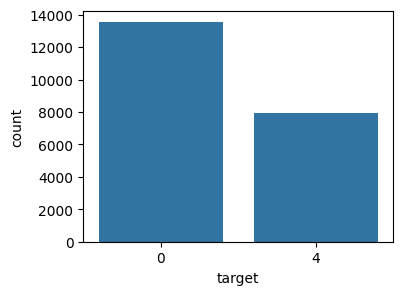

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(4,3))
sentiment_counts = apple_df['target'].value_counts().reset_index()
sentiment_counts.columns = ['target', 'count']
sns.barplot(x='target', y='count', data=sentiment_counts)
plt.show()

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=apple_df)

https://docs.google.com/spreadsheets/d/1mk7biJqK8cmqXs4LfHwTQIIR3aqS1YOTj5QG0B7oyU8/edit#gid=0
